In [1]:
import pandas  as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
data = pd.read_csv(r"D:\jupyter_project\Time_Series\timeSeries\data\daily-total-female-births-CA.csv")
import statsmodels.api as sm

from statsmodels.graphics.api import qqplot

data['date'] = pd.to_datetime(data['date'])
data.sort_values(by='date', inplace = True)

#### ADFULLER -TEST :---->

"""
Hypothesis Test
Ho: It is non stationary.
H1: It is stationary.
"""

def adfuller_test(sales):
    result = adfuller(sales)
    labels = ["ADF Test Statistic",'p-value',"#Lags Used","No. of observations"]
    for value,label in zip(result, labels):
        print(label,':',str(value))
        
    if result[1] <= 0.05:
        print("Strong Evidence against null hypothesis(Ho),reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Weak Evidence against null hypothesis(H1), time series has a unit root, indicating it is non-stationary ")
        
def stationarity_test(timeseries):
    # Get rolling statistics for window = 12 i.e. yearly statistics
    rolling_mean = timeseries.rolling(window = 12).mean()
    rolling_std = timeseries.rolling(window = 12).std()
    
    # Plot rolling statistic
    plt.figure(figsize= (10,6))
    plt.xlabel('Years')
    plt.ylabel('No of Air Passengers')    
    plt.title('Stationary Test: Rolling Mean and Standard Deviation')
    plt.plot(timeseries, color= 'blue', label= 'Original')
    plt.plot(rolling_mean, color= 'green', label= 'Rolling Mean')
    plt.plot(rolling_std, color= 'red', label= 'Rolling Std')   
    plt.legend()
    plt.show()
    
    # Dickey-Fuller test
    print('Results of Dickey-Fuller Test')
    df_test = adfuller(timeseries)
    df_output = pd.Series(df_test[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in df_test[4].items():
        df_output['Critical Value (%s)' %key] = value
    print(df_output)

In [2]:
data

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


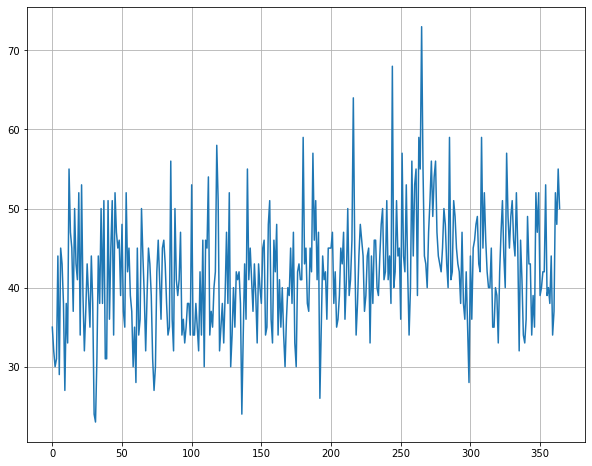

In [3]:
plt.figure(figsize=(10, 8))
data.births.plot()
plt.grid("-")

Stationarity is an important concept in time-series and any time-series data should undergo a stationarity test before proceeding with a model.

We use the ‘Augmented Dickey-Fuller Test’ to check whether the data is stationary or not which is available in the ‘pmdarima’ package.

In [4]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(data['births'])

(0.01, False)

In [5]:
adfuller_test(data['births'])

ADF Test Statistic : -4.808291253559764
p-value : 5.2434129901498554e-05
#Lags Used : 6
No. of observations : 358
Strong Evidence against null hypothesis(Ho),reject the null hypothesis. Data has no unit root and is stationary


In [6]:
data.set_index("date", inplace = True)

In [7]:
train_data= data[["births"]][:335]
test_data= data[["births"]][335:]
print("Train_data_shape", train_data.shape)
print("Test_data_shape", test_data.shape)

Train_data_shape (335, 1)
Test_data_shape (30, 1)


In the Auto ARIMA model, note that small p,d,q values represent non-seasonal components, and capital P, D, Q represent seasonal components. It works similarly like hyper tuning techniques to find the optimal value of p, d, and q with different combinations and the final values would be determined with the lower AIC, BIC parameters taking into consideration.

In [8]:
# from pmdarima.arima import auto_arima
# arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
#                           max_p=5, max_d=5, max_q=5, start_P=0, 
#                           D=1, start_Q=0, max_P=5, max_D=5,
#                           max_Q=5, m=12, seasonal=True, 
#                           error_action='warn',trace = True,
#                           supress_warnings=True,stepwise = True,
#                           random_state=20,n_fits = 50 )

In [9]:
from pmdarima.arima import auto_arima
arima_model = auto_arima(train_data, start_p=0, d=1, start_q=0,
                        max_p=20, max_d=20, max_q=20, 
                        start_P=0, D=1, start_Q=0, max_P=20, max_D=20, max_Q=20,
                        m=12, seasonal=True, 
                        error_action='warn', trace = True, 
                        suppress_warnings=True, stepwise= True,
                        random_state=20, n_fits = 50
                        )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2588.672, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2411.028, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.48 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2517.802, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2369.434, Time=0.31 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=2352.175, Time=0.60 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=2337.650, Time=0.96 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=2332.468, Time=1.97 sec
 ARIMA(1,1,0)(6,1,0)[12]             : AIC=2326.137, Time=3.51 sec
 ARIMA(1,1,0)(7,1,0)[12]             : AIC=2327.269, Time=4.36 sec
 ARIMA(1,1,0)(6,1,1)[12]             : AIC=2321.089, Time=13.26 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=2319.090, Time=7.73 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=2317.225, Time=4.21 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=2315.580, Time=1.97 sec
 ARIMA(1,1,0)(2,1,1)[12

In [10]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  335
Model:             SARIMAX(1, 1, 0)x(3, 1, [1], 12)   Log Likelihood               -1151.790
Date:                              Mon, 27 Mar 2023   AIC                           2315.580
Time:                                      22:08:05   BIC                           2338.228
Sample:                                  01-01-1959   HQIC                          2324.622
                                       - 12-01-1959                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4705      0.048     -9.719      0.000      -0.565      -0.376
ar.S.L12      -0.1383      0.066     -2.096      0.036      -0.268      -0.009
ar.S.L24      -0.0517      0.075     -0.690      0.490      -0.199       0.095
ar.S.L36      -0.0049      0.072     -0.069      0.945      -0.146       0.136
ma.S.L12      -0.8859      0.056    -15.808      0.000      -0.996      -0.776
sigma2        69.8109      5.747     12.147      0.000      58.547      81.075
===================================================================================
Ljung-Box (L1) (Q):                   5.97   Jarque-Bera (JB):                 1.48
Prob(Q):                              0.01   Prob(JB):                         0.48
Heteroskedasticity (H):               1.00   Skew:                             0.16
Prob(H) (two-sided):                  0.99   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
test_data

,births
date,
1959-12-02,32
1959-12-03,46
1959-12-04,41
1959-12-05,34
1959-12-06,33
1959-12-07,36
1959-12-08,49
1959-12-09,43
1959-12-10,43


In [12]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 30),index=test_data.index).rename(columns={0:"predictions"}).round(1)
prediction.head(3)

,predictions
date,
1959-12-02,48.6
1959-12-03,49.0
1959-12-04,48.3


In [13]:
test_data.head(3)

,births
date,
1959-12-02,32
1959-12-03,46
1959-12-04,41


In [14]:
df = pd.concat([prediction,test_data], axis =1)

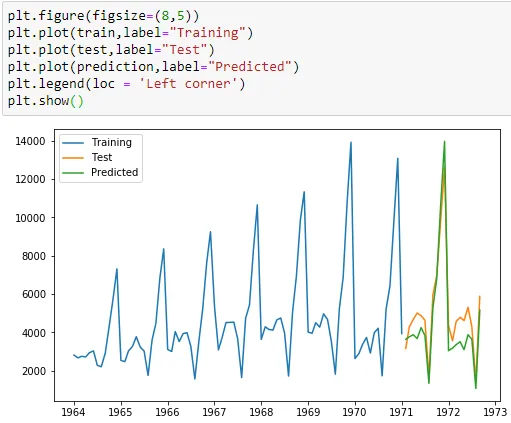

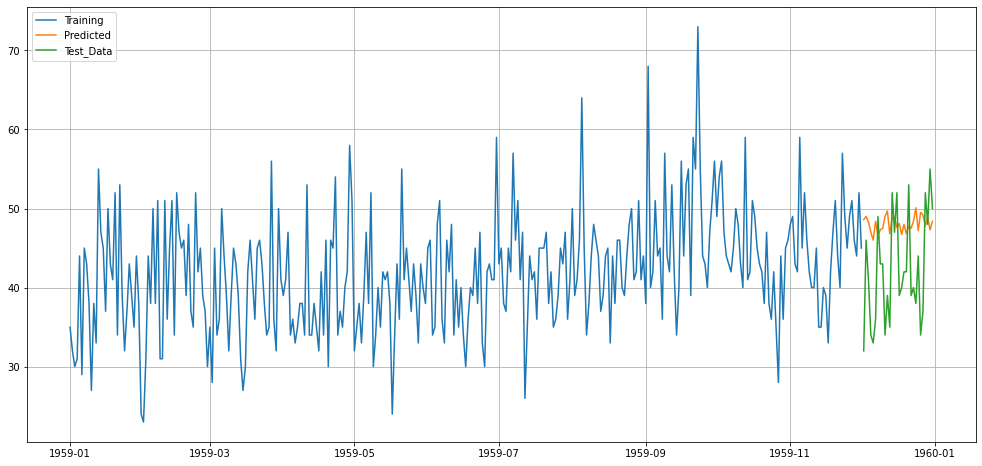

In [15]:
plt.figure(figsize=(17, 8))
plt.plot(train_data, label = 'Training')
plt.plot(prediction, label = 'Predicted')
plt.plot(test_data,  label = 'Test_Data')
plt.plot()
plt.legend(loc='upper left')
plt.grid("-")
plt.show()